# Introducción  

## Características  
- **Fecha**: La fecha de la observación  
- **PrecioPromedio**: El precio promedio de un solo aguacate  
- **Tipo**: Convencional u orgánico  
- **Año**: El año de registro  
- **Región**: La ciudad o región de la observación  
- **VolumenTotal**: Número total de aguacates vendidos  
- **4046**: Total de aguacates vendidos con PLU 4046  
- **4225**: Total de aguacates vendidos con PLU 4225  
- **4770**: Total de aguacates vendidos con PLU 4770  

## Propósito  
Este cuaderno tiene como objetivo realizar un análisis exhaustivo del conjunto de datos, que incluye:  

- Limpieza y preparación de datos  
- Análisis descriptivo  
- Análisis exploratorio (EDA)  
- Manipulación de datos (wrangling)  


## Tabla de Contenidos  
1. [Carga y Limpieza de Datos](#1-carga-y-limpieza-de-datos)  
2. [Análisis Descriptivo](#2-análisis-descriptivo)  
3. [Análisis Exploratorio (EDA)](#3-análisis-exploratorio-eda)  
4. [Orgánico vs Convencional](#4-orgánico-vs-convencional)  
5. [Tendencia de Aguacates Orgánicos](#5-tendencia-de-aguacates-orgánicos)  
6. [Estacionalidad y Precios](#6-estacionalidad-y-precios)  
7. [Análisis por Región](#7-análisis-por-región)  


In [1]:
# Data manipulation
from datetime import datetime
import pandas as pd
import numpy as np
import warnings
from ydata_profiling import ProfileReport


# Data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("Solarize_Light2")
# %matplotlib inline  # para Jupyter Notebook

# preprocessing
from sklearn.preprocessing import (StandardScaler, RobustScaler, 
                                  MinMaxScaler, Normalizer, OneHotEncoder)

# Machine Learning
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

warnings.filterwarnings('ignore')

# 1. Carga de datos y limpieza de datos

In [2]:
agu = pd.read_csv("/home/alex/Documents/uni/7/data/avocado/avocado/data/avocado.csv")

In [3]:
display(agu.head(5))
print(agu.info())
print(agu.describe())
print("\n", agu.shape)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900

The first column gives reduntant index data, so lets drop it

In [4]:
agu.drop('Unnamed: 0', axis=1, inplace=True)

Valores nulos

<Axes: >

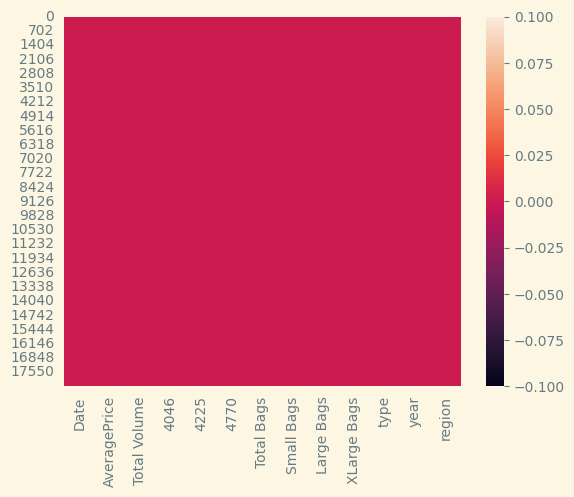

In [5]:
sns.heatmap(agu.isnull())

No hay valores nulos

# 2. Análisis Descriptivo
En esta sección analizaremos más detenidamente los datos, haremos distribuciones, limpiaremos aún más los datos, calcularemos estadísticas básicas iniciales y comenzaremos a analizar el conjunto de datos.
Para ello, vamos a examinar cada característica.

In [6]:
agu.info()
agu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 2.1 Strings

Ahora echemos un vistazo a las columnas con el tipo de dato 'object'

In [7]:
agu.select_dtypes('object').columns

Index(['Date', 'type', 'region'], dtype='object')

type
conventional    9126
organic         9123
Name: count, dtype: int64


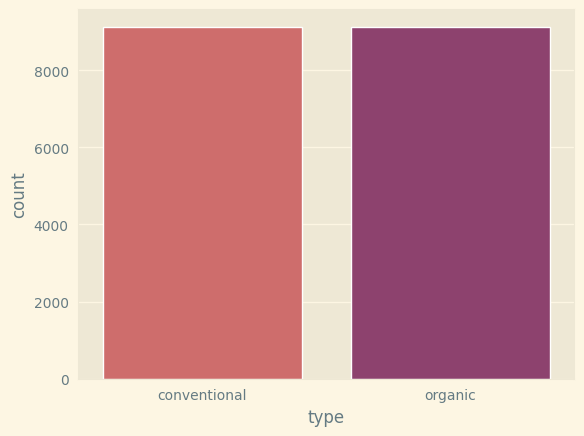

In [9]:

print(agu['type'].value_counts())
sns.countplot(x='type', data=agu, palette='flare')  # Usa x='type' o y='type'
plt.show()

- Tenemos dos clases que están casi perfectamente distribuidas. Los datos están balanceados y podrían utilizarse como clasificador en un algoritmo de aprendizaje automático.

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

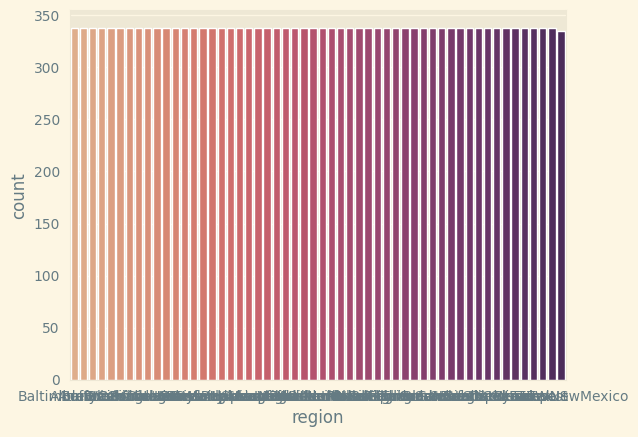

In [11]:
print(agu['region'].value_counts())
print('\n', 'There are:', len(agu['region'].unique()), 'unique values in the feature')

# Versión actualizada (usando x='region') ✅
sns.countplot(x='region', data=agu, palette='flare')  

plt.show()

- Las características tienen 54 valores únicos que están perfectamente distribuidos en el conjunto de datos.
- Para fines de aprendizaje automático, los datos podrían transformarse con la fórmula OneHotEncoder para obtener una mayor variedad de características y construir un modelo de machine learning.
- Los datos también pueden utilizarse para analizar el comportamiento de precios y la cantidad vendida en cada región.

## 2.2 Numbers

In [12]:
agu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


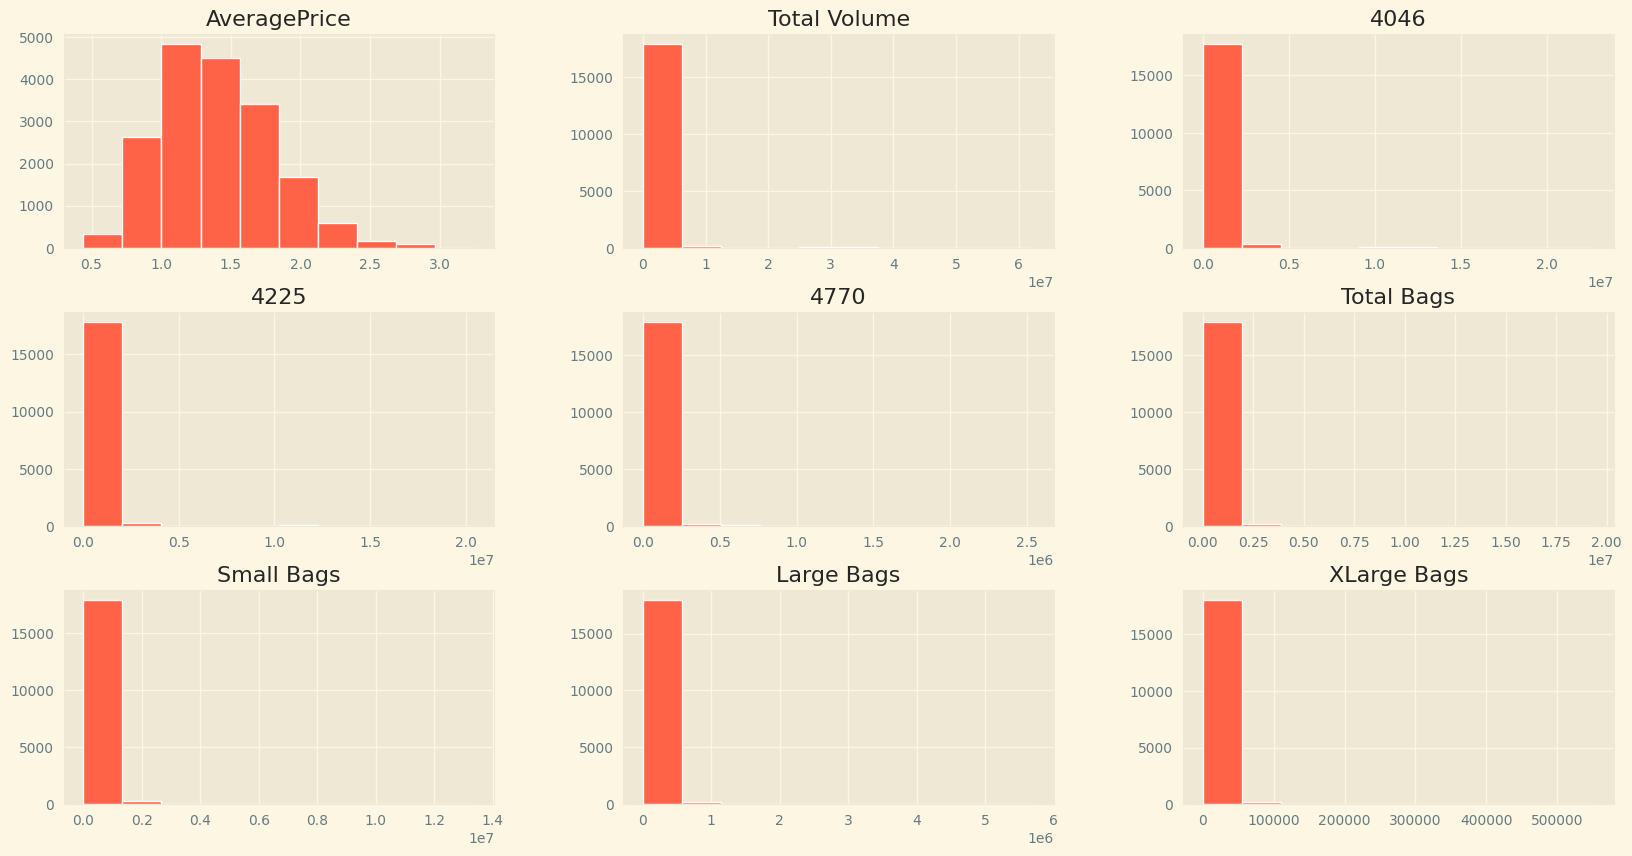

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [13]:
numbers = list(agu.select_dtypes(['float64', 'int64']).keys())

# removing years
numbers.remove('year')

agu[numbers].hist(figsize=(20,10), color='#FF6347', edgecolor='white')

plt.show()

display(agu[numbers].describe())

**AveragePrice.**
- Presenta la distribución más normal. La media y la mediana están muy cercanas, lo que indica que la distribución no está severamente influenciada por valores atípicos. Sin embargo, tiene una ligera asimetría a la derecha, ya que la media es mayor que la mediana.

**Otras características**
- Las demás características están fuertemente influenciadas por valores atípicos. La mayoría de los valores se concentran en el primer segmento de los histogramas, y la media es significativamente mayor que la mediana.
- Estas características parecen seguir la misma distribución, lo cual tiene sentido ya que la información (cantidad vendida) es similar.

Eliminemos los valores atípicos de las cantidades para ver si obtenemos una distribución más normal.


# Análisis de la variable Total Volume

Se realizó un análisis visual de la distribución del volumen total de ventas para identificar valores atípicos, es esencial para decidir si deben ser tratados, ya que pueden influir desproporcionadamente en los modelos predictivos. Este análisis visual permite entender la dispersión y detectar anomalías de forma rápida y efectiva.


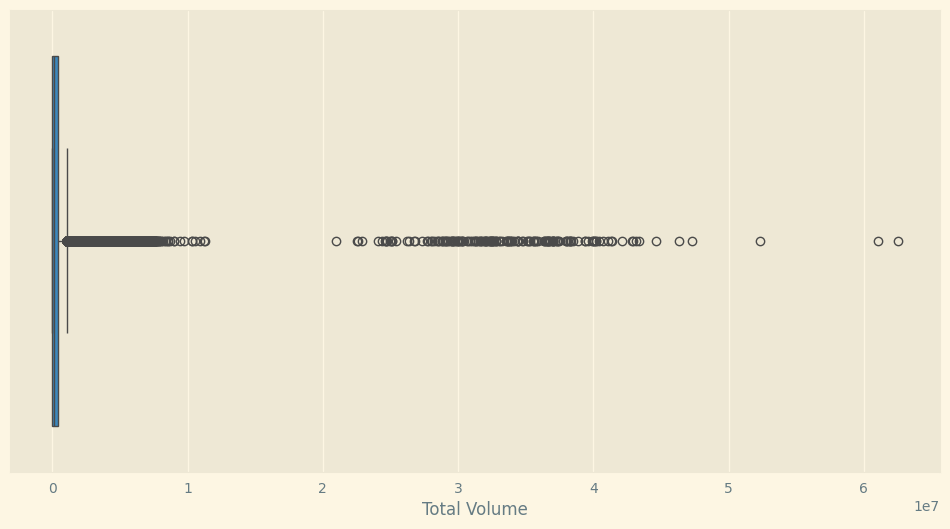

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=agu['Total Volume'])
plt.show()




El análisis visual a través del boxplot de la variable Total Volume permitió identificar una alta concentración de datos en valores bajos y la presencia de numerosos valores atípicos (outliers) a lo largo de la escala.

Observaciones:

    El volumen total de ventas muestra una distribución altamente sesgada hacia valores pequeños.
    Existen valores extremos (mayores a 20 millones) que aparecen de forma aislada.
    La dispersión es muy amplia, lo que puede afectar negativamente el rendimiento de los modelos predictivos si no se corrige.




# Detección y eliminación de valores atípicos en Total Volume

Se utilizó el método del rango intercuartílico (IQR) para identificar y eliminar valores atípicos permitiendo eliminar únicamente aquellas observaciones que se consideran extremos estadísticamente, preservando la estructura general de los datos.


In [23]:
Q1, Q3 = agu['Total Volume'].quantile([0.25, 0.75]) ## aqui se calcula el rango intercuartilico del 25% al 75%
IQR = Q3 - Q1 ## se calcula el rango intercuartilico
lim_inf, lim_sup = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ## se calculan los limites inferior
print(lim_inf, lim_sup)

-622346.985 1066147.855


In [26]:
# Posteriormente, se filtraron los datos:
df = agu[(agu['Total Volume'] >= lim_inf) & (agu['Total Volume'] <= lim_sup)] 



# Reanálisis de la variable Total Volume tras limpieza

Se volvió a graficar el boxplot para observar la nueva distribución después de eliminar los outliers:


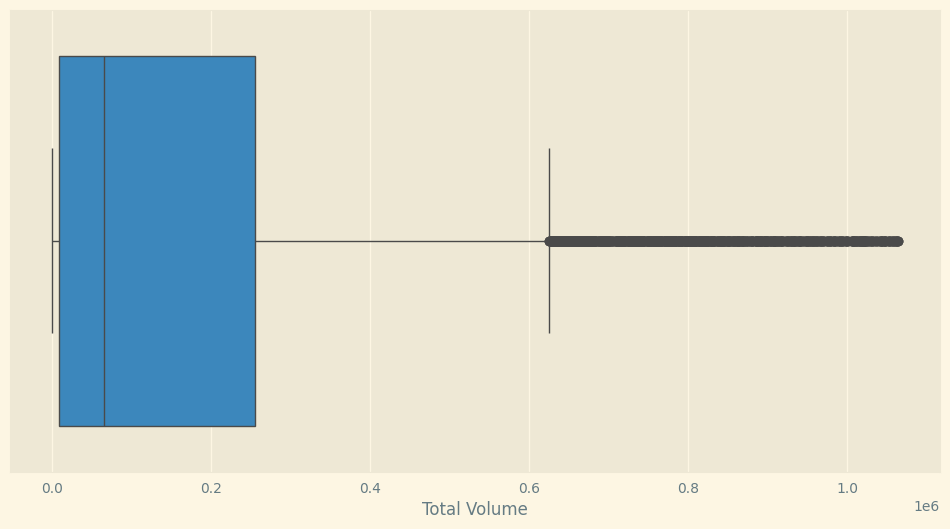

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Total Volume'])
plt.show()


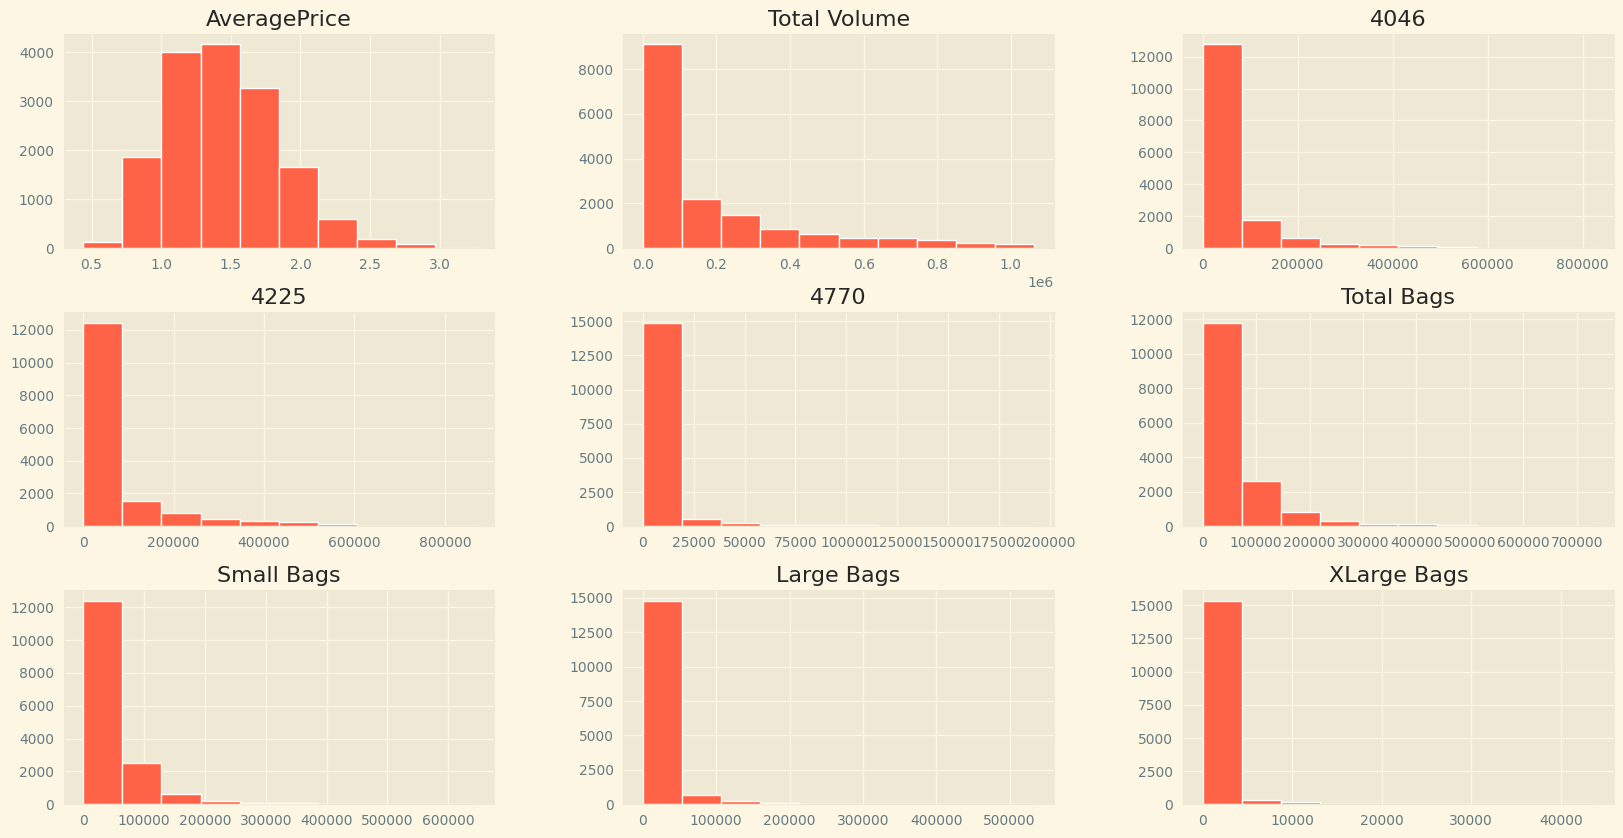

In [29]:
df[numbers].hist(figsize=(20,10), color='#FF6347', edgecolor='white')

plt.show()

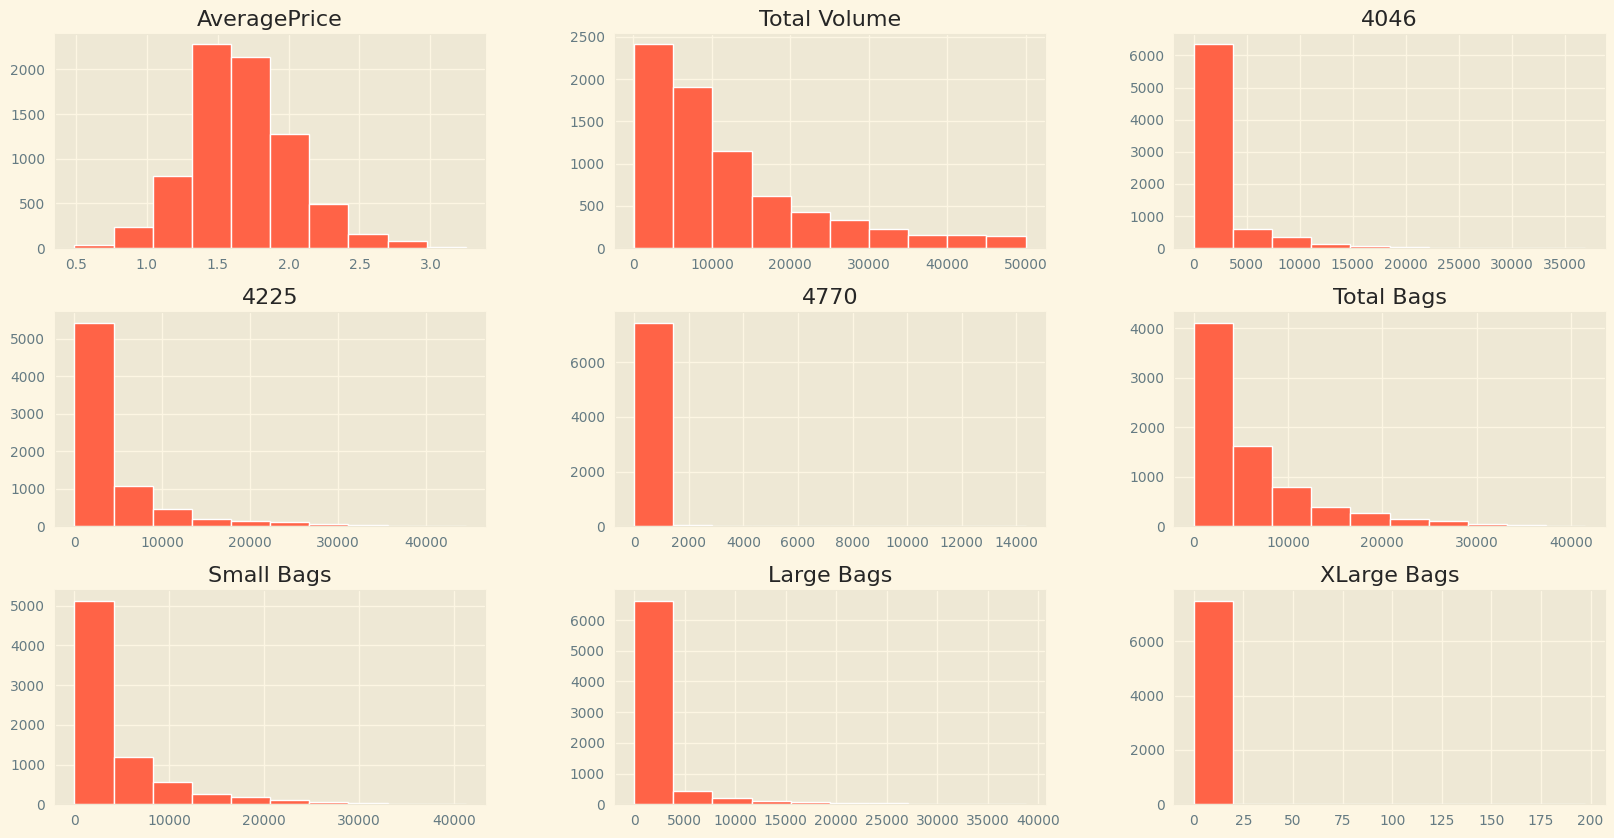

In [14]:
#avo_o = agu[agu['Total Volume']<50000]
#avo_o[numbers].hist(figsize=(20,10), color='#FF6347', edgecolor='white')

#plt.show()

Este tipo de distribuciones, donde la mayoría de los valores se concentran en los rangos bajos y luego descienden, son muy comunes. Podrían representarse de manera diferente mediante fórmulas logarítmicas para hacerlas más "normales" y útiles para modelos (como modelos de regresión), sin necesidad de eliminar valores atípicos.

A continuación un ejemplo con **Total Volume**:

<Axes: >

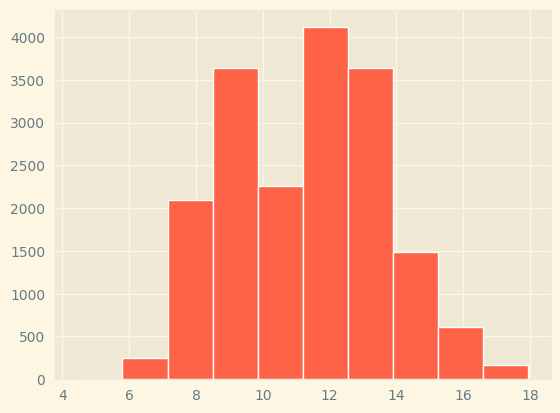

In [15]:
TotalLog = np.log(agu['Total Volume'] + 1)
TotalLog.hist(color='#FF6347', edgecolor='white')

## 2.3 Dates

Tenemos dos columnas: 'Date' (Fecha) y 'year' (año), donde 'year' es el año extraído de 'Date'. Para facilitar el análisis, extraigamos el día y el mes de 'Date' y observemos cada valor por separado. De esta manera, tendremos dos columnas adicionales potencialmente útiles: **day** (día) y **month** (mes).

In [16]:
agu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [17]:
agu['Date'] = agu['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

agu['month'] = agu['Date'].dt.month
agu['day'] = agu['Date'].dt.day
# monday = 0
agu['day of week'] = agu['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
agu[dates]

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


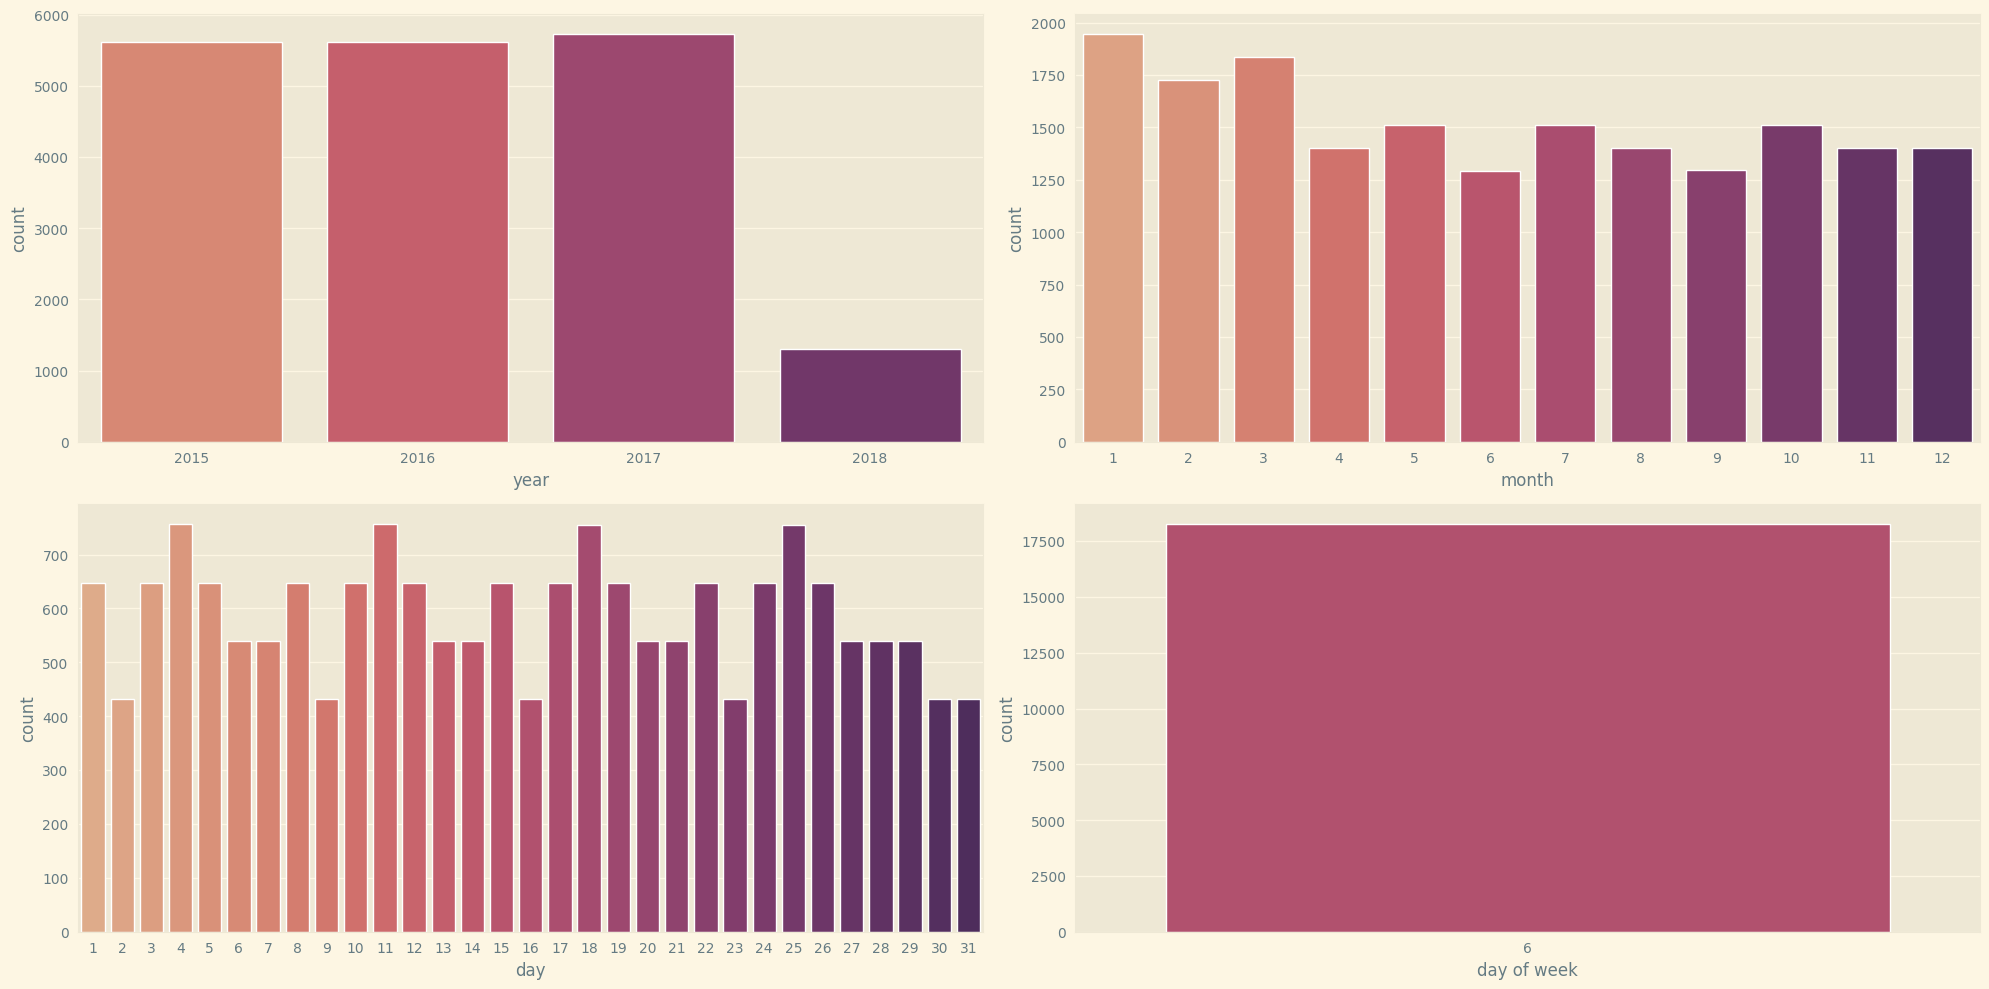

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Gráficos actualizados con x= (o y= si prefieres barras horizontales)
sns.countplot(x='year', data=agu, ax=ax[0, 0], palette='flare')
sns.countplot(x='month', data=agu, ax=ax[0, 1], palette='flare')
sns.countplot(x='day', data=agu, ax=ax[1, 0], palette='flare')
sns.countplot(x='day of week', data=agu, ax=ax[1, 1], palette='flare')

plt.tight_layout()  # Mejor ajuste de los subplots
plt.show()

**year**  
- 2015, 2016 y 2017 tienen valores casi idénticos.  
- 2018 es el más bajo, probablemente porque los datos terminan a principios de 2018.  

**month**  
- Muestra un patrón descendente. Esto podría deberse a la misma razón que el año: 2018 finaliza a principios de año, por lo que los primeros meses tienen más registros.  

**day & day of week**  
- El gráfico de días muestra una tendencia repetitiva, explicada porque los datos siempre se registraron el **día 6 (domingo)**.  
- Como los datos se registraron semanalmente, la columna **'day of week'** se vuelve redundante y puede eliminarse.  

In [19]:
agu.drop('day of week', axis=1, inplace=True)

## 2.4 Conclusiones del análisis descriptivo

- **'type'**:  
  - Tiene dos categorías balanceadas  
  - Podría usarse como clasificador en la construcción de modelos  

- **'region'**:  
  - Presenta 54 valores únicos perfectamente balanceados  
  - Sería candidata para codificación one-hot en modelos  

- **'avg_price'**:  
  - Muestra distribución bastante normal  
  - Parece prometedora como variable objetivo para modelos de regresión  

- **Columnas de unidades vendidas**:  
  - Presentan datos similares con distribución comparable  
  - Podrían aplicarse transformaciones logarítmicas para mejorar el rendimiento del modelo  

- **'dates'**:  
  - Distribución uniforme hasta 2018  
  - Los datos se registraron semanalmente (cada domingo)  
  - Permite análisis temporal consistente  

Comencemos a analizar y explorar los datos para obtener insights a partir del data wrangling y tener una idea más clara de cómo será el modelo.

In [20]:
agu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  month         18249 non-null  int32         
 14  day           18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), in

# 3. EDA
## 3.1 Correlaciones
- Comencemos analizando las correlaciones para poder representar nuestros datos en un diagrama de dispersión junto con el tipo de aguacate  
- Vamos a examinar tanto el conjunto de datos con valores atípicos como sin ellos  

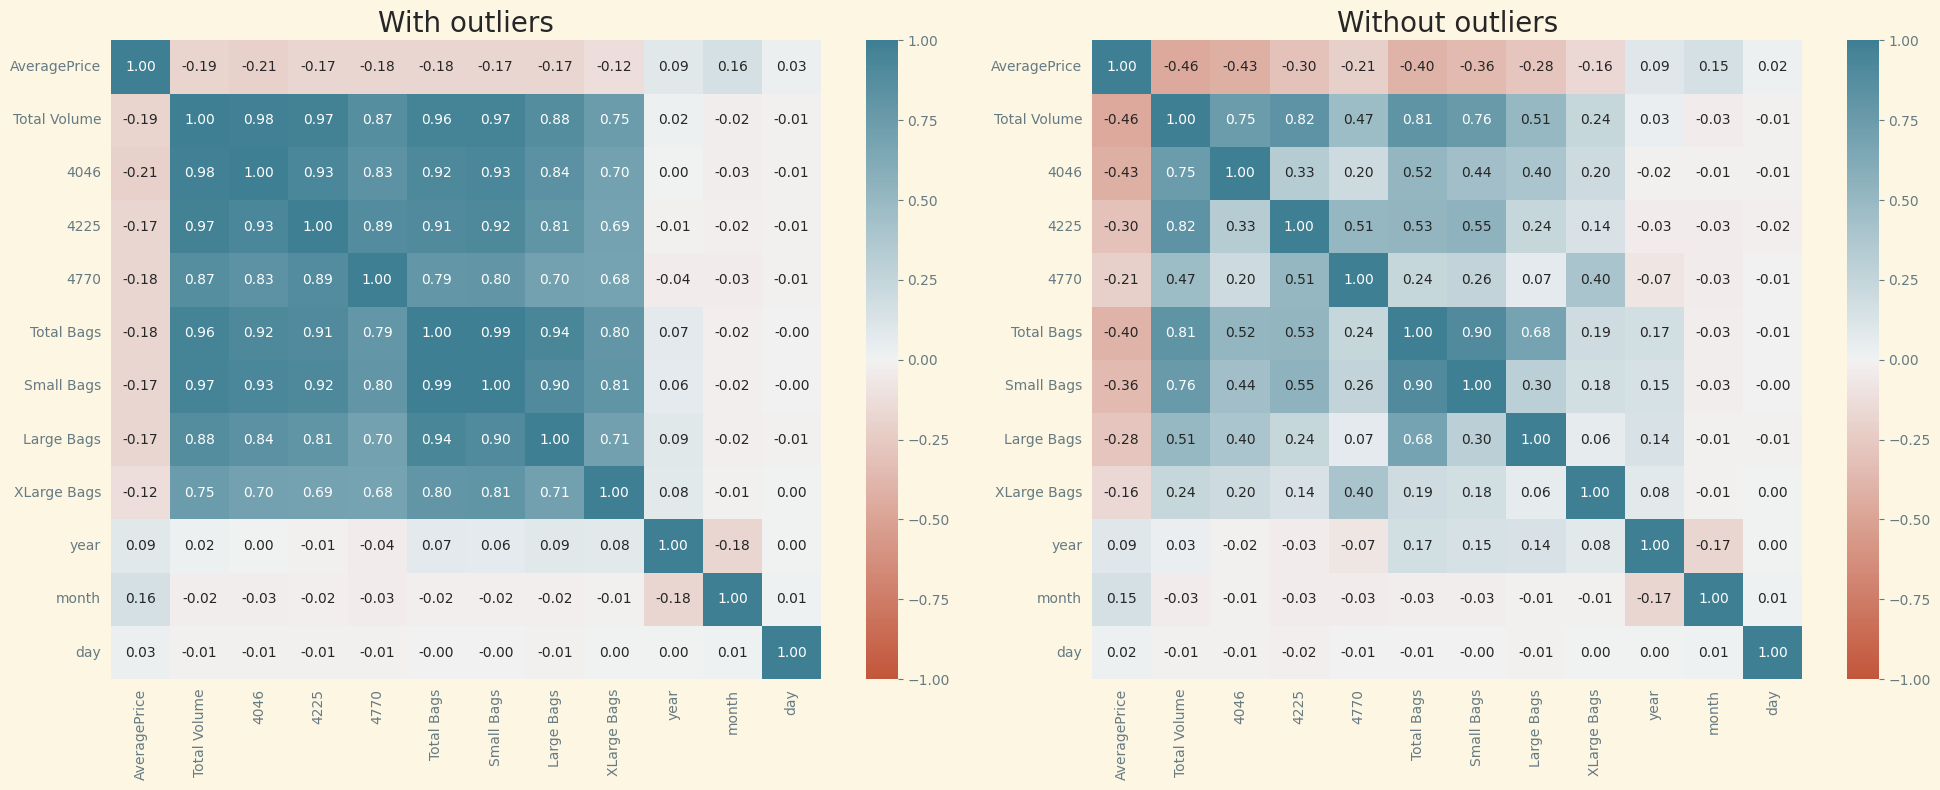

In [31]:
# Seleccionar solo columnas numéricas
numeric_cols = agu.select_dtypes(include=['float64', 'int64','int32']).columns

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

#avo_o = avo[avo['Total Volume'] < 50000]

# Configuración común para heatmaps
heatmap_kws = {
    'vmin': -1,
    'vmax': 1,
    'cmap': sns.diverging_palette(20, 220, as_cmap=True),
    'annot': True,
    'fmt': '.2f',
    'center': 0
}

# Heatmap con outliers (solo columnas numéricas)
sns.heatmap(agu[numeric_cols].corr(), ax=ax[0], **heatmap_kws)
ax[0].set_title('With outliers', fontsize=20)

# Heatmap sin outliers (solo columnas numéricas)
sns.heatmap(df[numeric_cols].corr(), ax=ax[1], **heatmap_kws)
ax[1].set_title('Without outliers', fontsize=20)

plt.tight_layout()
plt.show()

- Seleccionaremos la relación más fuerte de las variables de volumen y la más fuerte de las variables de fecha  
- Extraeremos las relaciones con AveragePrice (nuestra variable objetivo para el modelo de regresión) de ambos mapas de calor  
- Graficaremos el diagrama de dispersión coloreando por tipo de aguacate (nuestra variable objetivo para el modelo de clasificación)  


<Axes: xlabel='month', ylabel='AveragePrice'>

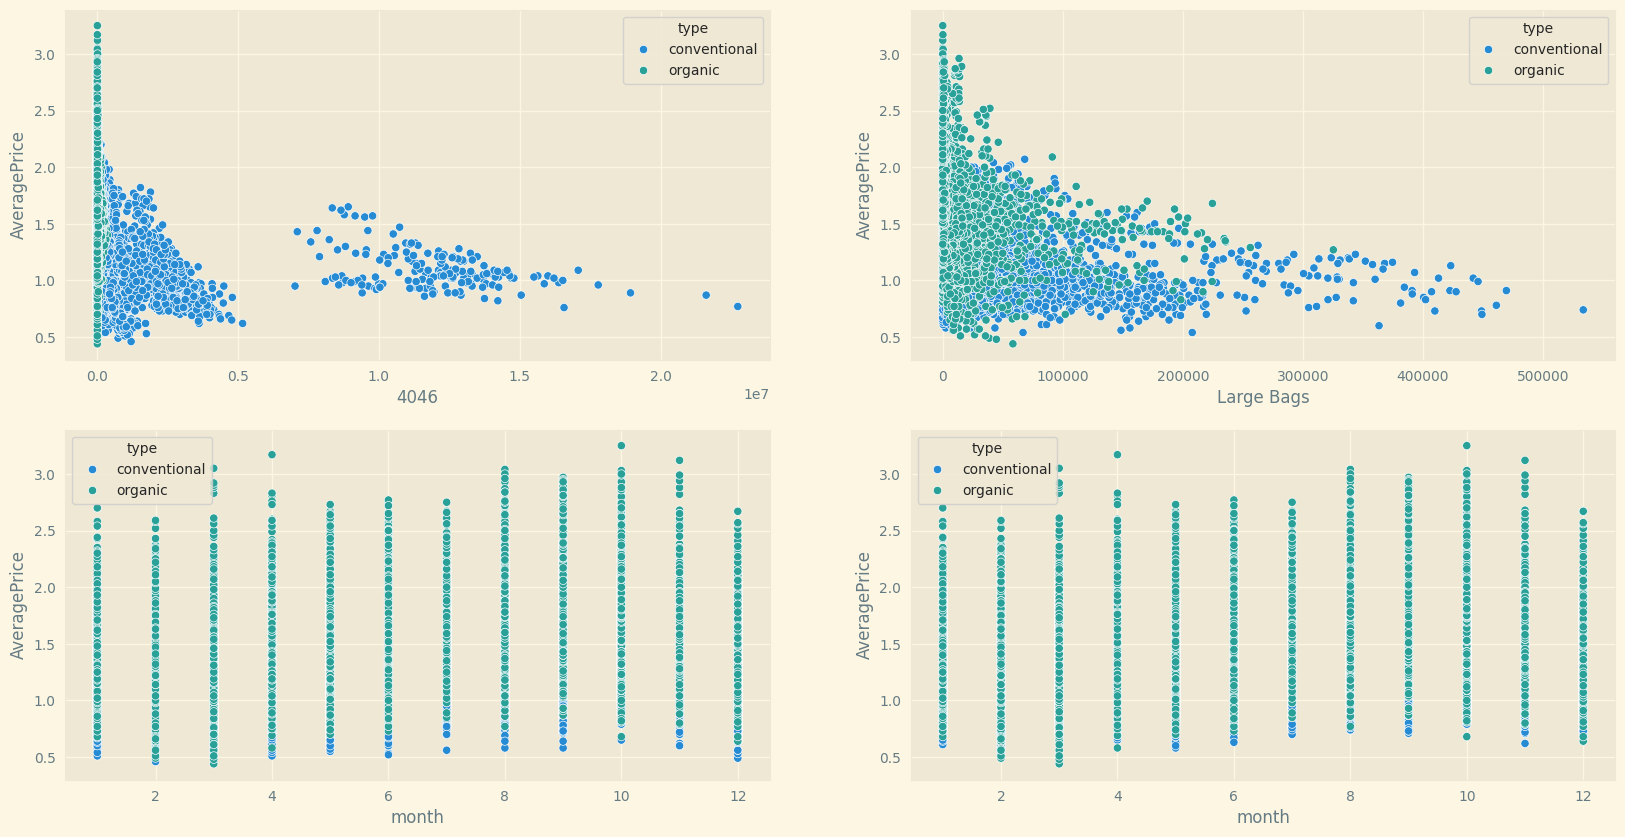

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

sns.scatterplot(x='4046', y='AveragePrice', data=agu, hue='type', ax=ax[0,0])
sns.scatterplot(x='Large Bags', y='AveragePrice', data=df, hue='type', ax=ax[0,1])
sns.scatterplot(x='month', y='AveragePrice', data=agu, hue='type', ax=ax[1,0])
sns.scatterplot(x='month', y='AveragePrice', data=df, hue='type', ax=ax[1,1])

- Un insight importante aquí es que no podemos quitar los outliers ya que todos corresponden al tipo convencional, lo que significa que los aguacates convencionales se venden mucho más que los orgánicos  
- No parece haber relación entre el mes y el AveragePrice. Lo que podemos ver en este gráfico es que el precio promedio de los aguacates convencionales es mucho menor que el de los orgánicos. **Analizaremos esto más a fondo en las próximas secciones**  
- Hay una tendencia decreciente esperada para ambos tipos: mientras más unidades se venden, menor es el precio promedio. **También analizaremos esto más adelante**  
- Quizás una mejor forma de representar los datos no es eliminando los outliers sino normalizándolos. Probemos esto ahora con AveragePrice y 4046  

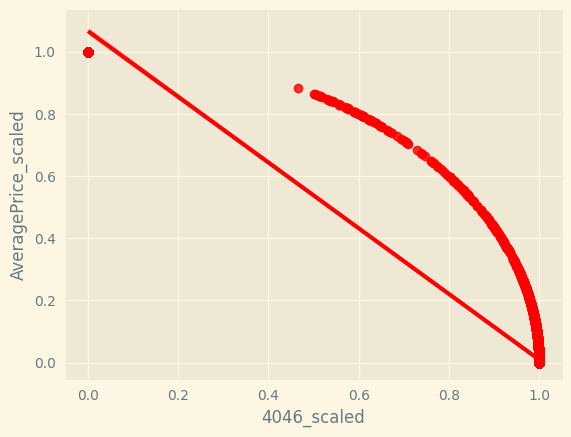

In [33]:
scaler = Normalizer()
scaler.fit(agu[['4046', 'AveragePrice']].values)
agu['4046_scaled'] = scaler.transform(agu[['4046', 'AveragePrice']].values)[:,0]
agu['AveragePrice_scaled'] = scaler.transform(agu[['4046', 'AveragePrice']].values)[:,1]
sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=agu, color='r')
plt.show()

Ahora sabemos que tanto la regresión como la clasificación son posibles, ya que existe una tendencia clara en los datos.

## 3.2 Dates
¿Podemos predecir el precio o el volumen haciendo un análisis de series temporales?

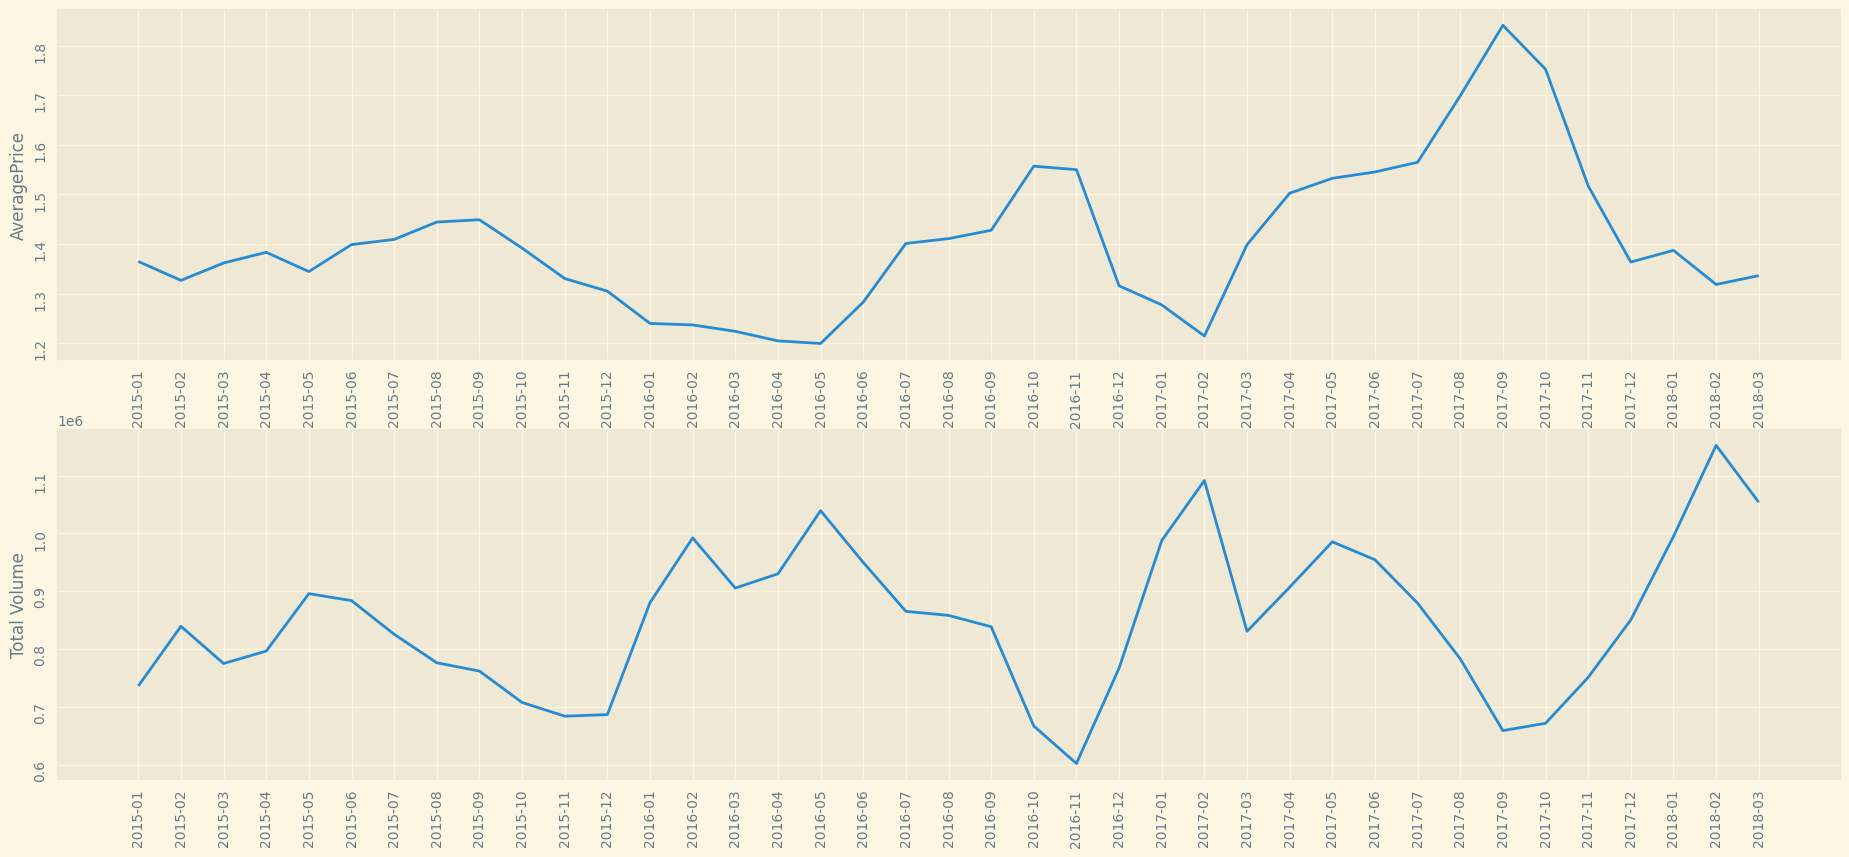

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(23,10))

agu['year_month'] = agu['Date'].dt.to_period('M')
grouped = agu.groupby('year_month')[['AveragePrice', 'Total Volume']].mean()

ax[0].plot(grouped.index.astype(str), grouped['AveragePrice'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('AveragePrice')


ax[1].plot(grouped.index.astype(str), grouped['Total Volume'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('Total Volume')

plt.show()


- Del gráfico podemos observar que, en primer lugar, el precio promedio y el volumen total se mueven en direcciones opuestas
- El volumen total tiene un pico a principios de año. Por otro lado, el precio promedio disminuye a principios de año
- Estas caídas y picos son indicio de estacionalidad y podrían ser útiles para pronósticos
- Analizaremos más a fondo esta estacionalidad en las próximas secciones

## 3.3 EDA Conclusiones
- Los aguacates convencionales se venden mucho más que los orgánicos y cuestan menos. Por lo tanto, el volumen total, junto con otras variables de volumen, y el precio promedio, funcionarán bien para predecir nuestra variable objetivo (tipo) en el modelo de clasificación.
- El precio promedio y el volumen total se mueven en direcciones opuestas, lo que será útil al realizar un análisis de regresión sobre nuestra variable objetivo (precio promedio).
- En el análisis de series de tiempo, observamos que hay un pico en el volumen total y una caída en los precios a principios de año, lo que sugiere estacionalidad y posibilidades de pronóstico.

# 4. ¿Qué tipo se vende más? ¿Cuál es más caro?
Ya sabemos por secciones anteriores que el orgánico es más caro y se vende menos, pero veamos los números exactos.

In [35]:
agu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 18249 non-null  datetime64[ns]
 1   AveragePrice         18249 non-null  float64       
 2   Total Volume         18249 non-null  float64       
 3   4046                 18249 non-null  float64       
 4   4225                 18249 non-null  float64       
 5   4770                 18249 non-null  float64       
 6   Total Bags           18249 non-null  float64       
 7   Small Bags           18249 non-null  float64       
 8   Large Bags           18249 non-null  float64       
 9   XLarge Bags          18249 non-null  float64       
 10  type                 18249 non-null  object        
 11  year                 18249 non-null  int64         
 12  region               18249 non-null  object        
 13  month                18249 non-

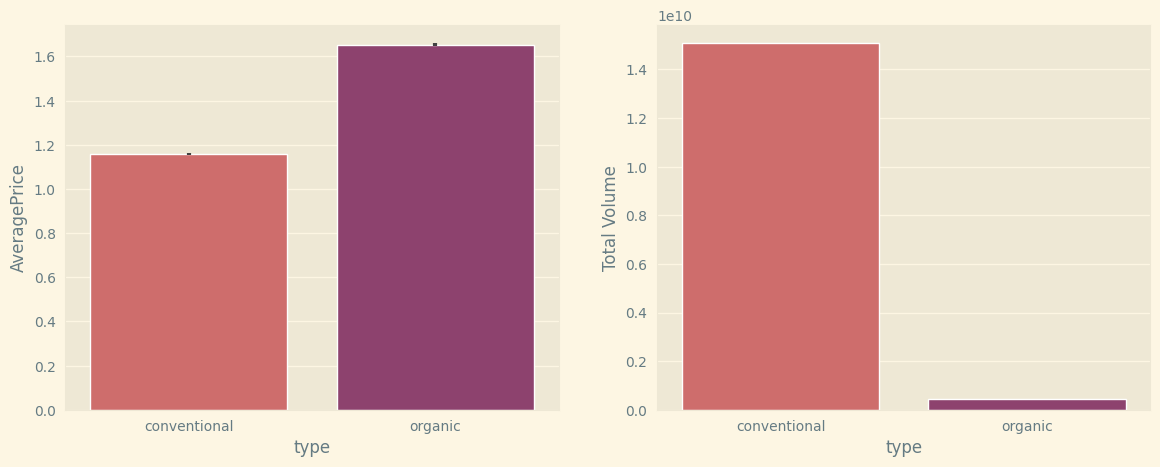

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x='type', y='AveragePrice', data=agu, palette='flare', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=agu, palette='flare', ax=ax[1], estimator=sum, ci=None)
plt.show()

display(agu.groupby('type')['AveragePrice'].mean())
display(agu.groupby('type')['Total Volume'].sum())

- Vemos que lo convencional es más barato que lo orgánico, pero lo más impactante es que las ventas de convencional superan ampliamente a las orgánicas.

- Los aguacates convencionales tienen un rendimiento bastante bueno, mientras que los orgánicos se están quedando atrás. Pero, ¿al menos los orgánicos están ganando popularidad?

# 5. Estan ganando popularidad los organicos?

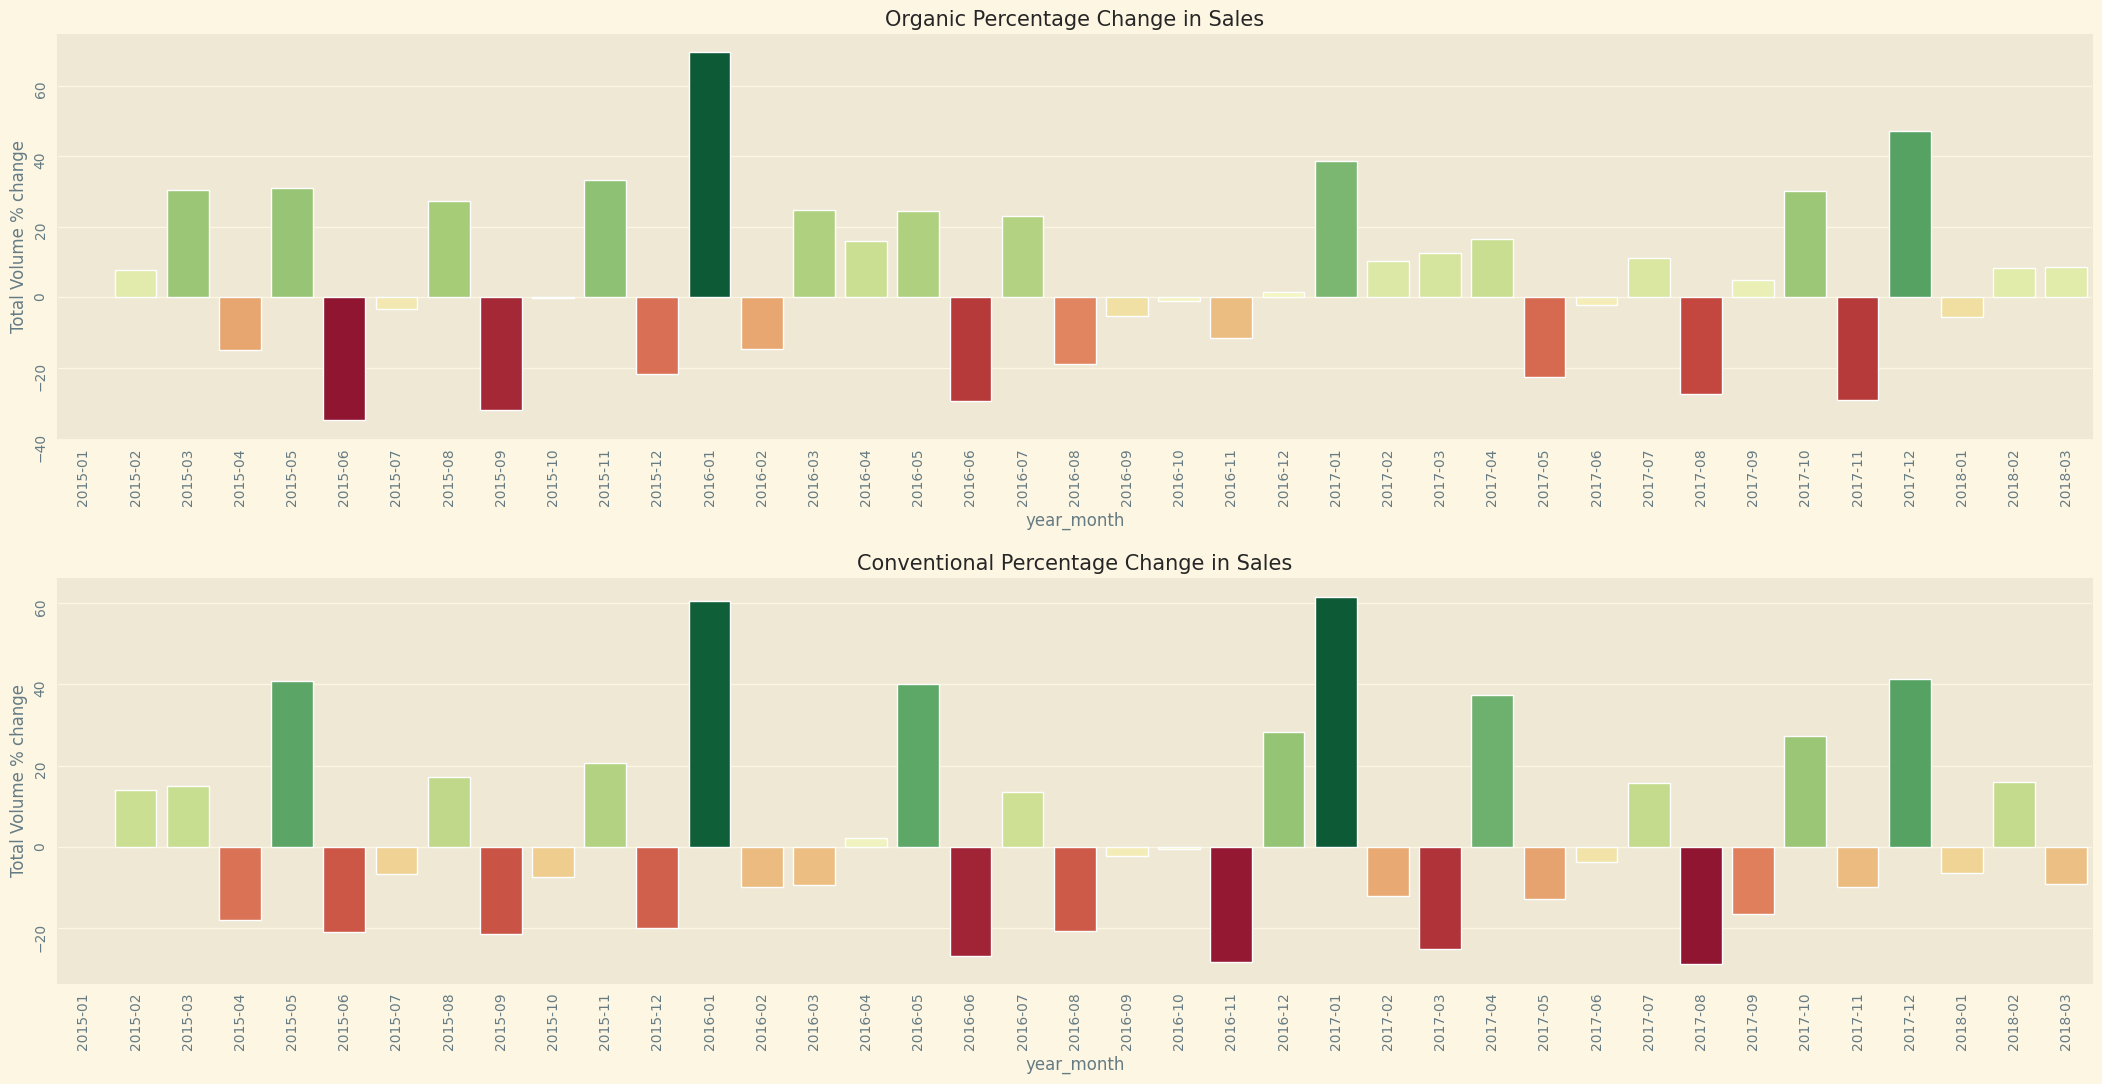

Mean % change (Conventional): 3.60578947368421
Sum of % change (Organic): 200.48
Sum of % change (Conventional): 137.02


In [37]:
import matplotlib.colors as mcolors  # Asegúrate de importar esto

fig, ax = plt.subplots(2, 1, figsize=(23, 12))
fig.tight_layout(pad=8)

# Agrupar datos
group = agu.groupby(['type', 'year_month'])['Total Volume'].sum()

# Datos para 'organic' y 'conventional'
organic = group['organic'].to_frame()
organic['Total Volume % change'] = np.round(organic['Total Volume'].pct_change() * 100, 2)

conventional = group['conventional'].to_frame()
conventional['Total Volume % change'] = np.round(conventional['Total Volume'].pct_change() * 100, 2)

# Configurar normalización con TwoSlopeNorm (reemplazo de DivergingNorm)
norm_organic = mcolors.TwoSlopeNorm(
    vmin=organic['Total Volume % change'].min(),
    vcenter=0,
    vmax=organic['Total Volume % change'].max()
)

norm_conventional = mcolors.TwoSlopeNorm(
    vmin=conventional['Total Volume % change'].min(),
    vcenter=0,
    vmax=conventional['Total Volume % change'].max()
)

# Mapear colores usando RdYlGn (rojo-amarillo-verde)
cmap = plt.cm.RdYlGn

# Gráfico para Organic
colors_organic = [cmap(norm_organic(val)) for val in organic['Total Volume % change']]
sns.barplot(
    x=organic.index,
    y=organic['Total Volume % change'],
    palette=colors_organic,
    ax=ax[0]
)

# Gráfico para Conventional
colors_conventional = [cmap(norm_conventional(val)) for val in conventional['Total Volume % change']]
sns.barplot(
    x=conventional.index,
    y=conventional['Total Volume % change'],
    palette=colors_conventional,
    ax=ax[1]
)

# Ajustes de estilo
ax[0].tick_params(labelrotation=90)
ax[0].set_title('Organic Percentage Change in Sales', fontsize=15)

ax[1].tick_params(labelrotation=90)
ax[1].set_title('Conventional Percentage Change in Sales', fontsize=15)

plt.show()

# Estadísticas adicionales
print("Mean % change (Conventional):", conventional['Total Volume % change'].mean())
print("Sum of % change (Organic):", np.around(organic['Total Volume % change'].sum(), 2))
print("Sum of % change (Conventional):", np.around(conventional['Total Volume % change'].sum(), 2))

- Es difícil de determinar solo con el gráfico, pero si sumamos todos los cambios porcentuales, encontramos que lo orgánico tiene un crecimiento mayor en general con un 200.48 frente al 137.02 de lo convencional.  

### Añadamos algunos conceptos de estrategia empresarial para refinar la estrategia y las conclusiones:  

La **Matriz BCG** es un modelo que evalúa el desempeño de un negocio según su crecimiento y participación en el mercado. Tiene cuatro dimensiones:  
1. **Perros (Dogs)**: Productos con bajo crecimiento o baja participación en el mercado.  
2. **Interrogantes (Question Marks/Problem Child)**: Productos en mercados de alto crecimiento pero con baja participación.  
3. **Estrellas (Stars)**: Productos en mercados de alto crecimiento y con alta participación.  
4. **Vacas lecheras (Cash Cows)**: Productos en mercados de bajo crecimiento pero con alta participación.  

- Lo orgánico puede tener ventas mucho menores que lo convencional, pero su tasa de crecimiento (más alta que lo convencional) es una buena señal para seguir produciendo aguacates orgánicos, ya que ya tiene un mercado establecido. Esto es un indicador saludable para los negocios.  
  **Entonces, lo orgánico es una Estrella en la matriz BCG**. Una sugerencia sería implementar una estrategia de crecimiento empresarial con ellos: tecnologías y métodos que produzcan más y más barato, promoción e importaciones.  

- Los aguacates convencionales son muy exitosos y ya tienen una infraestructura empresarial establecida. Por lo tanto, **lo convencional son Vacas lecheras en la matriz BCG**, y las empresas deberían seguir produciéndolos al mismo ritmo o incluso aumentarlo.  

# 6. Estacionalidad: ¿Cuándo hay más aguacates y más baratos?  

La **Sección 3.2** nos dio una pista sobre la estacionalidad: **se producen más aguacates a principios de año**.  
Profundicemos en esto para confirmarlo.  

### Enfoque:  
- Obtener los trimestres.  
- Calcular el **volumen total promedio** y el **precio promedio** de cada trimestre.  

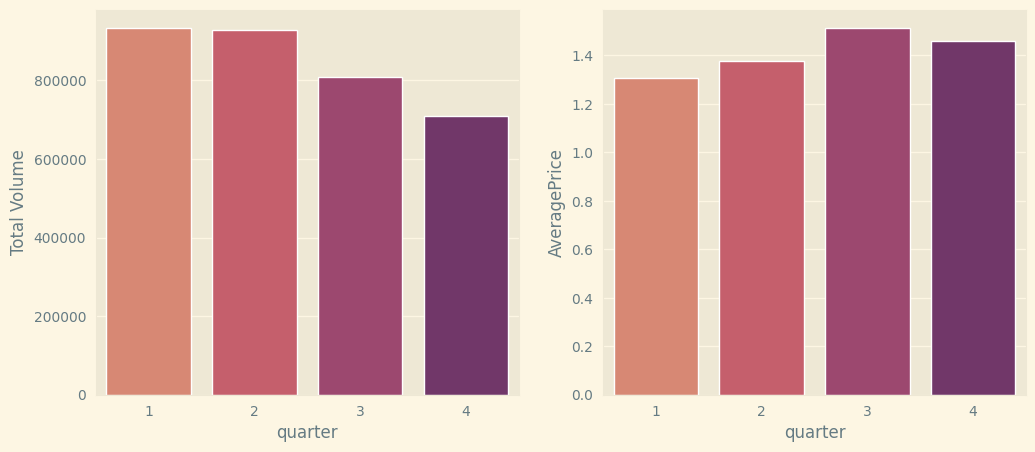

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

agu['quarter'] = agu['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=agu, palette='flare', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=agu, palette='flare', ci=None, ax=ax[1])


plt.show()

quarter = agu.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

- **Observamos que en el primer trimestre del año las ventas son mayores que en otros trimestres y los precios son los más bajos.**  
- **Después del primer trimestre, las ventas disminuyen y los precios aumentan.** Dada la popularidad de los aguacates, las empresas deberían considerar importar más aguacates cuando no se producen en el país, una gran oportunidad para empresarios de ambos países.  

# 7. Regiones: ¿Dónde puedo encontrar más aguacates y más baratos? 

In [40]:
agu.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,4046_scaled,AveragePrice_scaled,year_month,quarter
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,0.999999,0.001283,2015-12,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,0.999998,0.002002,2015-12,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,0.999999,0.001170,2015-12,4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,1.000000,0.000954,2015-12,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,0.999999,0.001360,2015-11,4


## 7.1 Precio

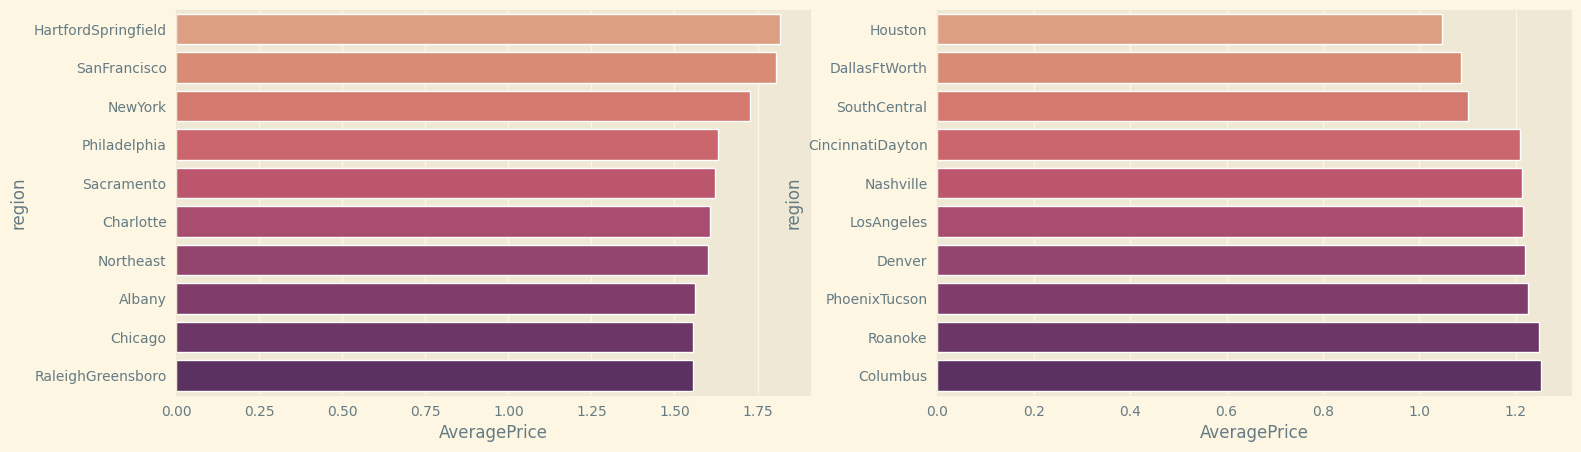

Los aguacates mas caros se encuentran en ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
Los mas baratos en ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [41]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = agu.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = agu, order=expensive.index, ci=None, palette='flare', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = agu, order=cheap.index, ci=None, palette='flare', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('Los aguacates mas caros se encuentran en {} '.format(list(expensive.iloc[:5,0])))
print('Los mas baratos en {} '.format(list(cheap.iloc[:5,0])))


## 7.2 Cantidad

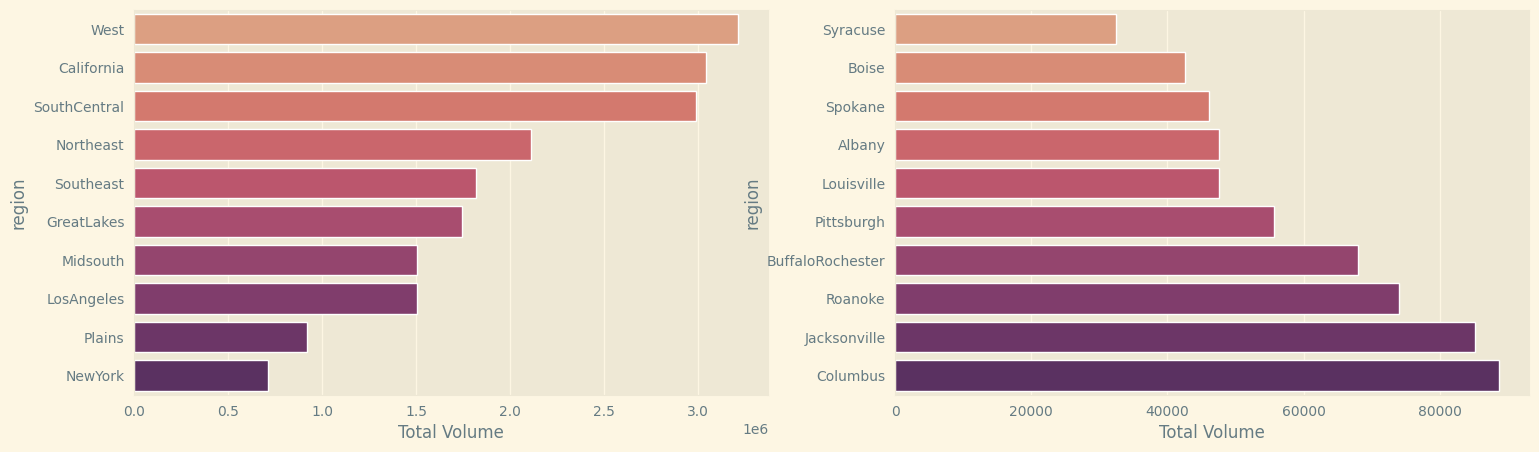

Los estados con mas demando son ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
Los estados con menos demando son ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

avoStates = agu[agu['region'] !='TotalUS']

regionV = avoStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = avoStates, order=most.index, ci=None, palette='flare', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = avoStates, order=least.index, ci=None, palette='flare', ax=ax[1])

plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('Los estados con mas demando son {} '.format(list(most.iloc[:5,0])))
print('Los estados con menos demando son {} '.format(list(least.iloc[:5,0])))

In [45]:
df.to_csv("trasnformado.csv", index=False)